<a href="https://colab.research.google.com/github/Sjankatti/SANTOSH/blob/master/Copy_of_MNIST_Hand_Written_Digits_28th_April.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [0]:
mnist = tf.keras.datasets.mnist

In [3]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
ytest.shape

(10000,)

In [5]:
ytrain[10]

3

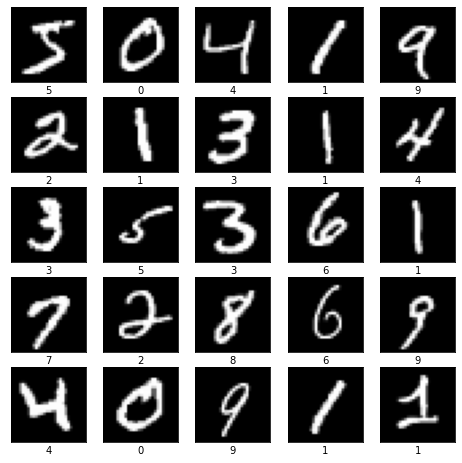

In [6]:
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(ytrain[i])
  plt.imshow(xtrain[i],cmap='gray')
plt.show()

In [0]:
xtrain = tf.keras.utils.normalize(xtrain)
xtest = tf.keras.utils.normalize(xtest)

In [0]:
### Build the Model
model =tf.keras.models.Sequential()

In [0]:
### Adding The layers
model.add(tf.keras.layers.Flatten())  #### Input layer
model.add(tf.keras.layers.Dense(784,activation='relu'))   #### hidden layer  (28x28)
model.add(tf.keras.layers.Dense(600,activation='relu'))   #### hidden layer
model.add(tf.keras.layers.Dense(64,activation='relu'))    #### hidden layer
model.add(tf.keras.layers.Dense(10,activation='softmax')) #### output layer

In [0]:
#### Configure the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.fit(xtrain,ytrain,epochs=3)  ### batch_size=32

Epoch 1/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2002 - accuracy: 0.9380
Epoch 2/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0857 - accuracy: 0.9737
Epoch 3/3
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0641 - accuracy: 0.9804


In [0]:
predictions = model.predict(xtest)

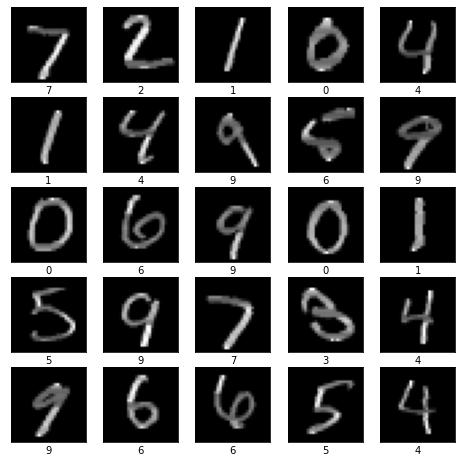

In [13]:
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(np.argmax(predictions[i]))
  plt.imshow(xtest[i],cmap='gray')
plt.show()

In [14]:
loss,accu = model.evaluate(xtest,ytest)
print(loss,accu)

313/313 [==============================] - 2s 5ms/step - loss: 0.0872 - accuracy: 0.9760
0.08716531097888947 0.9760000109672546
